# EDA

El Análisis Exploratorio de Datos (EDA) es una etapa esencial en cualquier proyecto de análisis de datos, especialmente cuando se trata de la seguridad vial en una ciudad como Buenos Aires. En este proceso, exploramos a fondo los datos relacionados con accidentes de tránsito para descubrir tendencias, patrones y factores que influyen en la cantidad de víctimas fatales.

Nos centraremos en identificar relaciones clave entre las distintas variables y las víctimas fatales, con el objetivo de ofrecer información útil a las autoridades responsables de la seguridad vial. Utilizando técnicas de visualización, estadísticas descriptivas y comparaciones entre datos, buscamos extraer conclusiones que apoyen la toma de decisiones informadas y la adopción de medidas preventivas más efectivas.

El propósito final de este análisis es contribuir a la disminución de las víctimas fatales en accidentes de tránsito en Buenos Aires, promoviendo así un entorno vial más seguro y protegiendo la vida de los ciudadanos.

---------------------------------------------------------------------------------------------------------

Se importan las librerías necesarias para realizar la carga de las tablas, las transformaciones necesarias y el análisis exploratorio de los datos.

In [1]:
import pandas as pd
import numpy as np
import funciones
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")

El Dataset utilizado para este análisis, lo componen dos hojas, la primera de Hechos y la segunda de Víctimas. Se dará inicio con la carga y transformación de la tabla Hechos, seguido de la tabla Víctimas:

### 1. Tabla de Hechos

Carga de los datos, utilizando la librería pandas y openpyxl.

In [2]:
df_hechos= pd.read_excel('homicidios.xlsx', sheet_name='HECHOS')
df_hechos.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


Se visualizan las columnas que componen esta tabla: 21 columnas.

In [3]:
df_hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

Normalización de los nombres de las columnas, para que todas queden en un mismo formato.

In [4]:
# Se coloca la primera en mayúscula
df_hechos.columns = [x.capitalize() for x in df_hechos.columns]

# Se reemplazan los guiones por espacios
df_hechos.columns = df_hechos.columns.str.replace('_', ' ')

# Se renombran algunas columnas
df_hechos = df_hechos.rename(columns={'N victimas':'Cantidad víctimas',
                                      'Aaaa':'Año',
                                      'Mm':'Mes',
                                      'Dd':'Día',
                                      'Hora':'Hora completa',
                                      'Hh':'Hora',
                                      'Xy (caba)':'XY (CABA)',
                                      'Pos x':'Pos X',
                                      'Pos y':'Pos Y',
                                      'Victima':'Víctima'})
df_hechos.columns

Index(['Id', 'Cantidad víctimas', 'Fecha', 'Año', 'Mes', 'Día',
       'Hora completa', 'Hora', 'Lugar del hecho', 'Tipo de calle', 'Calle',
       'Altura', 'Cruce', 'Dirección normalizada', 'Comuna', 'XY (CABA)',
       'Pos X', 'Pos Y', 'Participantes', 'Víctima', 'Acusado'],
      dtype='object')

El número total de registros o filas que contiene la tabla Hechos son 696.

In [5]:
df_hechos.shape[0]

696

#### 1.1 Chequeo de Nulos:

Los valores nulos encontrados se ubican en las columnas de 'Calle', 'Altura', 'Cruce' y 'Dirección normalizada'. Se puede observar que los valores nulos de la columna 'Altura' representan un 81.47% del total de sus datos, debido a que este dato se completa cuando el hecho ocurre en algún punto de la calle (altura de la calle) y la mayoría de los hechos registrados ocurrieron en esquinas. Por este motivo, se considera que no es un dato relevante para el análisis y se decide eliminarlo del conjunto. La siguiente columna con más valores nulos es 'Cruce', esta variable no tiene dato cuando se trata de un hecho ocurrido a la altura de una calle, puede ser interesante para evaluar si los hechos ocurren en esquinas o en algún punto de la cuadra.

In [6]:
df_hechos.isnull().sum()

Id                         0
Cantidad víctimas          0
Fecha                      0
Año                        0
Mes                        0
Día                        0
Hora completa              0
Hora                       0
Lugar del hecho            0
Tipo de calle              0
Calle                      1
Altura                   567
Cruce                    171
Dirección normalizada      8
Comuna                     0
XY (CABA)                  0
Pos X                      0
Pos Y                      0
Participantes              0
Víctima                    0
Acusado                    0
dtype: int64

In [7]:
# Porcentaje nulos de la columna Altura
nulos_altura = (567 * 100)/df_hechos.shape[0]
nulos_altura

81.46551724137932

In [8]:
# Eliminación de la columna Altura
df_hechos.drop('Altura', axis=1, inplace=True)

# Verificamos el cambio
df_hechos.head()

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora completa,Hora,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos X,Pos Y,Participantes,Víctima,Acusado
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


#### 1.2 Valores Faltantes:

Se puede observar con el análisis anterior de los valores nulos, que los datos faltantes en la columna 'Cruce' efectivamente son los que se refieren a un hecho en algún punto de la calle que no es una esquina o intersección de dos calles. Por lo tanto, se decide modificar esta columna en un valor 'Si' para los casos que son hechos en cruces de calles y 'No' en el caso que no sea un cruce de calles.

In [9]:
df_hechos['Cruce'] = np.where(df_hechos['Cruce'].notnull(), 'Si', 'No')

# Verificamos el cambio
df_hechos.head()

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora completa,Hora,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos X,Pos Y,Participantes,Víctima,Acusado
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,Si,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",Si,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,No,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,Si,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,Si,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


Anteriormente vimos que la columna 'Dirección normalizada' tiene 8 datos nulos, entonces vamos a completarla con los datos de 'Lugar del hecho'. Además se decide eliminar la columna 'Lugar del hecho' y reemplazarla con 'Dirección normalizada' porque se considera que no perdemos ningún dato. Y también que, en el caso de una futura búsqueda es útil poder utilizar el filtro alfabético. Mientras que si queremos buscar por tipo de calle tenemos la columna 'Tipo de calle'.

In [10]:
# Completar los valores faltantes de la columna 'Dirección normalizada' con los de 'Lugar del hecho'
df_hechos['Dirección normalizada'] = df_hechos['Dirección normalizada'].fillna(df_hechos['Lugar del hecho'])

# Eliminar columna 'Lugar del hecho' y se reemplaza con 'Dirección normalizada' a la cual se le cambia el nombre 
df_hechos = df_hechos.drop(columns=['Lugar del hecho']).rename(columns={'Dirección normalizada': 'Lugar del hecho'})

Por último, nos queda un valor faltante en la columna 'Calle', al no tener información suficiente para modificar ese dato faltante. Se cambia ese valor nulo por SD (Sin Dato), para seguir con la lógica original del dataset.

In [11]:
# Completar el valor faltante de la columna 'Calle' con SD
df_hechos['Calle'] = df_hechos['Calle'].fillna('SD')

#### 1.3 Registros Duplicados:

No se observan filas duplicadas. Podemos ver que en la columna 'Id' el total de registros únicos coincide con el total de filas o registros de la tabla Hechos.

In [12]:
print(f"La columna 'Id' cuenta con {len(df_hechos['Id'].unique())} valores únicos.")

La columna 'Id' cuenta con 696 valores únicos.


#### 1.4 Tipo de Dato:

Verificamos el tipo de dato de las columnas utilizando la función "verificar_tipo_dato" que se encuentra en el archivo funciones.py, y podemos observar que dos columnas 'Hora completa' y 'Hora', contienen varios tipos de dato, por ende se procede a la normalización de estos.

In [13]:
funciones.verificar_tipo_dato(df_hechos)

,nombre_campo,tipo_datos
0,Id,[<class 'str'>]
1,Cantidad víctimas,[<class 'int'>]
2,Fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...
3,Año,[<class 'int'>]
4,Mes,[<class 'int'>]
5,Día,[<class 'int'>]
6,Hora completa,"[<class 'datetime.time'>, <class 'str'>, <clas..."
7,Hora,"[<class 'int'>, <class 'str'>]"
8,Tipo de calle,[<class 'str'>]
9,Calle,[<class 'str'>]


##### 1.4.1 Columna 'Hora completa':

Verificamos la cantidad de valores por tipo de dato en la columna 'Hora completa'. Ya que la mayoría de los datos son de tipo datetime.time, procedemos a cambiar todos los valores a ese tipo de dato con la función "convertir_a_time" que se encuentra en el archivo funciones.py

In [14]:
df_hechos['Hora completa'].apply(type).value_counts()

Hora completa
<class 'datetime.time'>        608
<class 'str'>                   85
<class 'datetime.datetime'>      3
Name: count, dtype: int64

In [15]:
# Cambio de tipo de dato 
df_hechos['Hora completa'] = df_hechos['Hora completa'].apply(lambda x: funciones.convertir_a_time(x))

# Verificamos que se hayan modificado los valores
df_hechos['Hora completa'].apply(type).value_counts()

Hora completa
<class 'datetime.time'>    695
<class 'NoneType'>           1
Name: count, dtype: int64

Se puede observar que quedó un solo registro sin modificar y procedemos a ubicarlo. Vemos que definitivamente tiene Sin Dato (SD) en la columna 'Hora' y por consecuencia en 'Hora completa'. Se procede a rellenar el valor de 'Hora completa', para eso buscamos la hora que MÁS aparece en toda la columna (moda) y la vamos a colocar en el registro indicado.

In [16]:
df_hechos[df_hechos['Hora completa'].isna()]

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora completa,Hora,Tipo de calle,Calle,Cruce,Lugar del hecho,Comuna,XY (CABA),Pos X,Pos Y,Participantes,Víctima,Acusado
518,2019-0103,1,2019-12-18,2019,12,18,None,SD,GRAL PAZ,"PAZ, GRAL. AV.",Si,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


In [17]:
# Calculamos la hora mas común
hora_moda = df_hechos['Hora completa'].mode().iloc[0]
print(f'La hora mas común es: {hora_moda}')

# Reemplazamos el valor
df_hechos['Hora completa'].fillna(hora_moda, inplace=True)

# Verificamos el tipo de dato para toda la columna
df_hechos['Hora completa'].apply(type).value_counts()

La hora mas común es: 09:00:00


Hora completa
<class 'datetime.time'>    696
Name: count, dtype: int64

##### 1.4.2 Columna 'Hora':

Verificamos la cantidad de valores por tipo de dato en la columna 'Hora'. Ya que la mayoría de los datos son de tipo int y solo un string, podemos concluir entonces que ese registro es el encontrado en el análisis anterior para 'Hora completa' donde 'Hora' tiene como valor Sin Dato (SD). Procedemos a rellenar este valor con la 'Hora completa' que hallamos utilizando la moda.

In [18]:
df_hechos['Hora'].apply(type).value_counts()

Hora
<class 'int'>    695
<class 'str'>      1
Name: count, dtype: int64

In [19]:
# Agregamos el valor de la hora moda, en el dato faltante.
df_hechos['Hora'] = df_hechos['Hora'].apply(lambda x: int(hora_moda.hour) if x == 'SD' else x)

# Verificamos que se haya modificado el tipo de dato
df_hechos['Hora'].apply(type).value_counts()

Hora
<class 'int'>    696
Name: count, dtype: int64

Verificamos que el registro completo esté correctamente modificado.

In [20]:
df_hechos[df_hechos['Id'] == '2019-0103']

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora completa,Hora,Tipo de calle,Calle,Cruce,Lugar del hecho,Comuna,XY (CABA),Pos X,Pos Y,Participantes,Víctima,Acusado
518,2019-0103,1,2019-12-18,2019,12,18,09:00:00,9,GRAL PAZ,"PAZ, GRAL. AV.",Si,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


#### 1.5 Categorías de 'Víctima' y 'Acusado':

Se verifica que las categorías que aparecen en el dataset para estas dos columnas, son las indicadas en el diccionario de datos. En la columna 'Acusado' están las categorías correctas, pero en la columna 'Víctima' aparecen dos categorías (OBJETO FIJO) y (PEATON_MOTO), las cuales no están indicadas en el diccionario de datos. Se procede entonces a buscar estos registros y hacer un análisis más detallado para cada uno.

In [21]:
# Valores únicos de la columna 'Victima'
print(df_hechos['Víctima'].unique())

# Valores únicos de la columna 'Acusado'
print(df_hechos['Acusado'].unique())

['MOTO' 'AUTO' 'PEATON' 'SD' 'CARGAS' 'BICICLETA' 'PASAJEROS' 'MOVIL'
 'OBJETO FIJO' 'PEATON_MOTO']
['AUTO' 'PASAJEROS' 'SD' 'OBJETO FIJO' 'CARGAS' 'MOTO' 'MULTIPLE' 'OTRO'
 'BICICLETA' 'TREN']


In [22]:
# Se buscan los registros 
df_hechos[df_hechos['Víctima'].isin(['OBJETO FIJO', 'PEATON_MOTO'])]

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora completa,Hora,Tipo de calle,Calle,Cruce,Lugar del hecho,Comuna,XY (CABA),Pos X,Pos Y,Participantes,Víctima,Acusado
230,2017-0108,2,2017-09-02,2017,9,2,04:53:08,4,GRAL PAZ,"PAZ, GRAL. AV.",Si,"PAZ, GRAL. AV. y MACHAIN",12,Point (97098.48468623 109019.96106626),-58.49491054,-34.54795581,AUTO-OBJETO FIJO,OBJETO FIJO,AUTO
583,2020-0063,2,2020-12-05,2020,12,5,07:10:00,7,CALLE,NUEVA YORK,Si,NUEVA YORK y ALTA GRACIA,11,Point (94080.62190808 102083.62453795),-58.52783814,-34.61047001,PEATON_MOTO-MOTO,PEATON_MOTO,MOTO


##### 1.5.1 OBJETO FIJO:

Se puede analizar que la columna 'Acusado' SI recibe como categoría OBJETO FIJO y la columna 'Participantes' contiene la combinación AUTO-OBJETO FIJO, por ende, se realizará un intercambio de valores entras las columnas 'Víctima' y 'Acusado'.

In [23]:
# Para que solo el reemplazo se realice solo en esta fila
condicion = (df_hechos['Id'] == '2017-0108')
df_hechos.loc[condicion, 'Víctima'] = df_hechos.loc[condicion, 'Víctima'].replace('OBJETO FIJO', 'AUTO')
df_hechos.loc[condicion, 'Acusado'] = df_hechos.loc[condicion, 'Acusado'].replace('AUTO', 'OBJETO FIJO')

##### 1.5.2 PEATON_MOTO:

Se puede analizar que MOTO esta repetida dos veces, por ende, se asume que el error sucedió al momento de digitar el registro, entonces se realizará el cambio de PEATON_MOTO a solo PEATON y también se modificará la combinación en la columna 'Participantes'.

In [24]:
# Para que solo el reemplazo se realice solo en esta fila
condicion = (df_hechos['Id'] == '2020-0063')
df_hechos.loc[condicion, 'Participantes'] = df_hechos.loc[condicion, 'Participantes'].replace('PEATON_MOTO-MOTO', 'PEATON_MOTO')
df_hechos.loc[condicion, 'Víctima'] = df_hechos.loc[condicion, 'Víctima'].replace('PEATON_MOTO', 'PEATON')

Se verifica que los cambios aplicados se realizaron correctamente.

In [25]:
df_hechos[df_hechos['Id'].isin(['2017-0108','2020-0063'])]

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora completa,Hora,Tipo de calle,Calle,Cruce,Lugar del hecho,Comuna,XY (CABA),Pos X,Pos Y,Participantes,Víctima,Acusado
230,2017-0108,2,2017-09-02,2017,9,2,04:53:08,4,GRAL PAZ,"PAZ, GRAL. AV.",Si,"PAZ, GRAL. AV. y MACHAIN",12,Point (97098.48468623 109019.96106626),-58.49491054,-34.54795581,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO
583,2020-0063,2,2020-12-05,2020,12,5,07:10:00,7,CALLE,NUEVA YORK,Si,NUEVA YORK y ALTA GRACIA,11,Point (94080.62190808 102083.62453795),-58.52783814,-34.61047001,PEATON_MOTO,PEATON,MOTO


#### 1.6 Variables Geográficas:

Las columnas que tenemos con información geográfica son 'XY (CABA)', 'Pos X' y 'Pos Y'. Se puede observar que los datos de 'Pos Y' corresponden a los de Latitud y los datos de 'Pos X' corresponden a los de Longitud, se procede entonces a realizar el cambio de nombre y de posición en la tabla. También se puede observar que en estas tres columnas mencionadas anteriormente nos encontramos con celdas en [Point(. .) , . , .], las cuales procederemos a convertir en 0 para lograr un correcto análisis de todas las variables.

In [26]:
# Se renombran las columnas Pos X y Pos Y
df_hechos = df_hechos.rename(columns={'Pos X':'Longitud',
                                      'Pos Y':'Latitud',})

# Se organiza la posición de la columnas para que quede Latitud seguido de Longitud
df_hechos = df_hechos[['Id', 'Cantidad víctimas', 'Fecha', 'Año', 'Mes', 'Día',
       'Hora completa', 'Hora', 'Tipo de calle', 'Calle', 'Cruce',
       'Lugar del hecho', 'Comuna', 'XY (CABA)', 'Latitud', 'Longitud', 
       'Participantes', 'Víctima', 'Acusado']]

# Cambio de valores por 0
df_hechos['Latitud'] = df_hechos['Latitud'].replace('.', 0)
df_hechos['Longitud'] = df_hechos['Longitud'].replace('.', 0)
df_hechos['XY (CABA)'] = df_hechos['XY (CABA)'].replace('Point (. .)', 0)

In [27]:
# Verificamos un caso de los registros 
df_hechos[df_hechos['Id'] == '2021-0023']

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora completa,Hora,Tipo de calle,Calle,Cruce,Lugar del hecho,Comuna,XY (CABA),Latitud,Longitud,Participantes,Víctima,Acusado
621,2021-0023,1,2021-03-01,2021,3,1,09:20:00,9,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,No,"AU BUENOS AIRES LA PLATA KM 4,5",4,0,0,0,MOTO-CARGAS,MOTO,CARGAS


Al realizar el cambio de las variables anteriores por cero, podemos observar que dichas columnas quedaron con dos tipos de dato (int y str), por ende, se procederá a convertir estas tres columnas en tipo str solamente.

In [28]:
# Chequeo tipo de dato de las columnas
funciones.verificar_tipo_dato(df_hechos)

,nombre_campo,tipo_datos
0,Id,[<class 'str'>]
1,Cantidad víctimas,[<class 'int'>]
2,Fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...
3,Año,[<class 'int'>]
4,Mes,[<class 'int'>]
5,Día,[<class 'int'>]
6,Hora completa,[<class 'datetime.time'>]
7,Hora,[<class 'int'>]
8,Tipo de calle,[<class 'str'>]
9,Calle,[<class 'str'>]


In [29]:
# Convertir las columnas específicas de tipo (int y str) a tipo str
df_hechos['XY (CABA)'] = df_hechos['XY (CABA)'].astype(str)
df_hechos['Latitud'] = df_hechos['Latitud'].astype(str)
df_hechos['Longitud'] = df_hechos['Longitud'].astype(str)

### 2. Tabla de Víctimas

Carga de los datos, utilizando la librería pandas y openpyxl.

In [30]:
df_victimas= pd.read_excel('homicidios.xlsx', sheet_name='VICTIMAS')
df_victimas.head(3)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00


Se visualizan las columnas que componen esta tabla: 10 columnas.

In [31]:
df_victimas.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

Normalización de los nombres de las columnas, para que todas queden en un mismo formato.

In [32]:
# Se coloca la primera en mayúscula
df_victimas.columns = [x.capitalize() for x in df_victimas.columns]

# Se reemplazan los guiones por espacios
df_victimas.columns = df_victimas.columns.str.replace('_', ' ')

# Se renombran algunas columnas
df_victimas = df_victimas.rename(columns={'Id hecho': 'Id',
                                          'Aaaa':'Año',
                                          'Mm':'Mes',
                                          'Dd':'Día',
                                          'Victima':'Víctima'})
df_victimas.columns

Index(['Id', 'Fecha', 'Año', 'Mes', 'Día', 'Rol', 'Víctima', 'Sexo', 'Edad',
       'Fecha fallecimiento'],
      dtype='object')

El número total de registros o filas que contiene la tabla Víctimas son 717.

In [33]:
df_victimas.shape[0]

717

#### 2.1 Chequeo de Nulos:

No se observan columnas con valores nulos.

In [34]:
df_victimas.isnull().sum()

Id                     0
Fecha                  0
Año                    0
Mes                    0
Día                    0
Rol                    0
Víctima                0
Sexo                   0
Edad                   0
Fecha fallecimiento    0
dtype: int64

#### 2.2 Valores faltantes:

Teniendo en cuenta la lógica del Dataset y ya habiendo analizado la Tabla Hechos, se puede concluir que SD alude a Sin Dato, por ende, a datos faltantes; procederemos entonces a realizar un chequeo de estos.

In [35]:
df_victimas.apply(lambda x: (x == 'SD').sum())

Id                      0
Fecha                   0
Año                     0
Mes                     0
Día                     0
Rol                    11
Víctima                 9
Sexo                    6
Edad                   53
Fecha fallecimiento    68
dtype: int64

Se puede observar que tenemos 11 valores faltantes en la columna 'Rol', 9 valores faltantes en la columna 'Víctima' y 6 valores faltantes en la columna 'Sexo'. Estos se procederán a llenar con el valor más frecuente presente en dichas columnas, utilizando para esto la función "ingresa_valor_moda" que se encuentra en el archivo funciones.py

In [36]:
# Se modifica la columna Rol
funciones.ingresa_valor_moda(df_victimas, 'Rol')

# Se modifica la columna Víctima
funciones.ingresa_valor_moda(df_victimas, 'Víctima')

# Se modifica la columna Sexo
funciones.ingresa_valor_moda(df_victimas, 'Sexo')

El valor más frecuente de Rol es: CONDUCTOR
El valor más frecuente de Víctima es: MOTO
El valor más frecuente de Sexo es: MASCULINO


Continuamos con el cambio de SD en la columna 'Edad'... de igual forma esta se llenará con el valor más frecuente, pero esto se hará teniendo en cuenta una agrupación de edades promedio de la columna 'Sexo'. Para llevar a cabo esta operación utilizaremos la función "ingresa_edad_segun_sexo" que se encuentra en el archivo funciones.py

In [37]:
funciones.ingresa_edad_segun_sexo(df_victimas)

La edad promedio de Femenino es 51 y de Masculino es 40


Por último, podemos ver también que en la columna 'Fecha fallecimiento' hay valores faltantes. Debido a que necesitamos datos que nos ayuden a tomar decisiones para disminuir la cantidad de siniestros, se decide eliminar dicha columna ya que no aporta datos de interés.

In [38]:
df_victimas = df_victimas.drop('Fecha fallecimiento', axis=1)

# Se verifica que se haya eliminado la columna
df_victimas.head(3)

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30


#### 2.3 Registros Duplicados:

Se puede observar que no hay filas exactamente iguales y que el número de Id's únicos corresponde con el mismo número de la Tabla Hechos. Por ello, se puede concluir que los Id's repetidos contienen información de las diferentes víctimas implicadas, por ello no se debe proceder con la eliminación de ninguna fila. Para la confirmación de esta conclusión se utilizará la función "verificar_duplicados" que se encuentra en el archivo funciones.py

In [39]:
# Chequeo de cuantos Id de siniestros tiene
print(f"La columna 'Id' cuenta con {len(df_victimas['Id'].unique())} valores únicos.")

# Verificar presencia de filas exactamente iguales
df_victimas[df_victimas.duplicated()]

La columna 'Id' cuenta con 696 valores únicos.


,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad


In [40]:
# Chequeo de la conclusión, se está en lo correcto
funciones.verificar_duplicados(df_victimas, 'Id')

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad
29,2016-0041,2016-03-29,2016,3,29,CONDUCTOR,MOTO,MASCULINO,54
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,39
98,2016-0126,2016-09-18,2016,9,18,CONDUCTOR,AUTO,MASCULINO,37
99,2016-0126,2016-09-18,2016,9,18,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,60
163,2017-0026,2017-02-26,2017,2,26,PASAJERO_ACOMPAÑANTE,AUTO,FEMENINO,23
164,2017-0026,2017-02-26,2017,2,26,CONDUCTOR,AUTO,MASCULINO,19
173,2017-0035,2017-03-23,2017,3,23,CONDUCTOR,AUTO,MASCULINO,28
174,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,32
175,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,30
177,2017-0036,2017-03-29,2017,3,29,CONDUCTOR,MOTO,MASCULINO,20


#### 2.4 Tipo de Dato:

Verificamos el tipo de dato de las columnas utilizando la función "verificar_tipo_dato" que se encuentra en el archivo funciones.py, y podemos observar que todo se encuentra correcto, por ende, no se realizará ningún cambio de tipo de dato.

In [41]:
funciones.verificar_tipo_dato(df_victimas)

,nombre_campo,tipo_datos
0,Id,[<class 'str'>]
1,Fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...
2,Año,[<class 'int'>]
3,Mes,[<class 'int'>]
4,Día,[<class 'int'>]
5,Rol,[<class 'str'>]
6,Víctima,[<class 'str'>]
7,Sexo,[<class 'str'>]
8,Edad,[<class 'int'>]


### 3. Unificación de la Información

Se realizará una unificación de las tablas Hechos y Víctimas transformadas anteriormente, para el posterior gráfico de los datos y la creación del Dashboard. Para esto vamos a eliminar las columnas 'Fecha', 'Año', 'Mes', 'Día' y 'Víctima' del df_victimas, ya que tienen los mismos datos que en el df_hechos.

In [42]:
# Eliminación de columnas
df_victimas = df_victimas.drop(['Fecha', 'Año', 'Mes', 'Día', 'Víctima'], axis=1)

# Se unifica a través de la columna Id con how='left', indicando así que todas las filas de df_victimas se deben conservar aunque no tengan coincidencia en df_hechos.
df_homicidios = df_victimas.merge(df_hechos, on='Id', how='left')

# Verificamos la fusión
df_homicidios

,Id,Rol,Sexo,Edad,Cantidad víctimas,Fecha,Año,Mes,Día,Hora completa,...,Calle,Cruce,Lugar del hecho,Comuna,XY (CABA),Latitud,Longitud,Participantes,Víctima,Acusado
0,2016-0001,CONDUCTOR,MASCULINO,19,1,2016-01-01,2016,1,1,04:00:00,...,PIEDRA BUENA AV.,Si,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-34.68757022,-58.47533969,MOTO-AUTO,MOTO,AUTO
1,2016-0002,CONDUCTOR,MASCULINO,70,1,2016-01-02,2016,1,2,01:15:00,...,"PAZ, GRAL. AV.",Si,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-34.66977709,-58.50877521,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,CONDUCTOR,MASCULINO,30,1,2016-01-03,2016,1,3,07:00:00,...,ENTRE RIOS AV.,No,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-34.63189362,-58.39040293,MOTO-AUTO,MOTO,AUTO
3,2016-0004,CONDUCTOR,MASCULINO,18,1,2016-01-10,2016,1,10,00:00:00,...,LARRAZABAL AV.,Si,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-34.68092974,-58.46503904,MOTO-SD,MOTO,SD
4,2016-0005,CONDUCTOR,MASCULINO,29,1,2016-01-21,2016,1,21,05:20:00,...,SAN JUAN AV.,Si,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-34.62246630,-58.38718297,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,PEATON,FEMENINO,50,1,2021-12-12,2021,12,12,06:20:00,...,RIVADAVIA AV.,Si,RIVADAVIA AV. y PUEYRREDON AV.,3,Point (105258.35368554 102122.93231400),-34.61011987,-58.40596860,PEATON-AUTO,PEATON,AUTO
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18,1,2021-12-13,2021,12,13,17:10:00,...,RIESTRA AV.,Si,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-34.64561636,-58.43353773,MOTO-AUTO,MOTO,AUTO
714,2021-0094,PASAJERO_ACOMPAÑANTE,FEMENINO,43,1,2021-12-20,2021,12,20,01:10:00,...,"DELLEPIANE, LUIS, TTE. GRAL.",Si,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-34.65117757,-58.46739825,MOTO-AUTO,MOTO,AUTO
715,2021-0095,CONDUCTOR,MASCULINO,27,1,2021-12-30,2021,12,30,00:43:00,...,GAONA AV.,Si,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-34.61984745,-58.47293407,MOTO-CARGAS,MOTO,CARGAS


### 4. Gráficos

En este apartado se propone visualizar patrones dentro de los datos proporcionados buscando reconocer las distribuciones de las víctimas en función del tiempo, de la cantidad de accidentes, de las caracteristicas de las victimas, de los roles involucrados y el punto de ocurrencia de los hechos. Las funciones para la creación de las gráficas se encuentran en el archivo funciones.py

#### 4.1 Accidentes por Tipo de Calle y Cruces:

El gráfico de la izquierda presentado muestra una clara tendencia que las Avenidas son el tipo de calle donde se concentran la mayor cantidad de accidentes, seguidas por las Calles, General Paz y las Autopistas. Esto puede deberse a que en las Avenidas se presentan varios factores como: mayor flujo vehicular, presencia de intersecciones más complejas, mayor velocidad permitida y una mayor interacción entre diferentes tipos de vehículos y peatones.
El gráfico de la derecha indica que los cruces son puntos críticos en términos de accidentes de tránsito y, por ende, de víctimas. Esto se debe a la mayor complejidad de las maniobras y al mayor riesgo de colisiones en estos puntos.

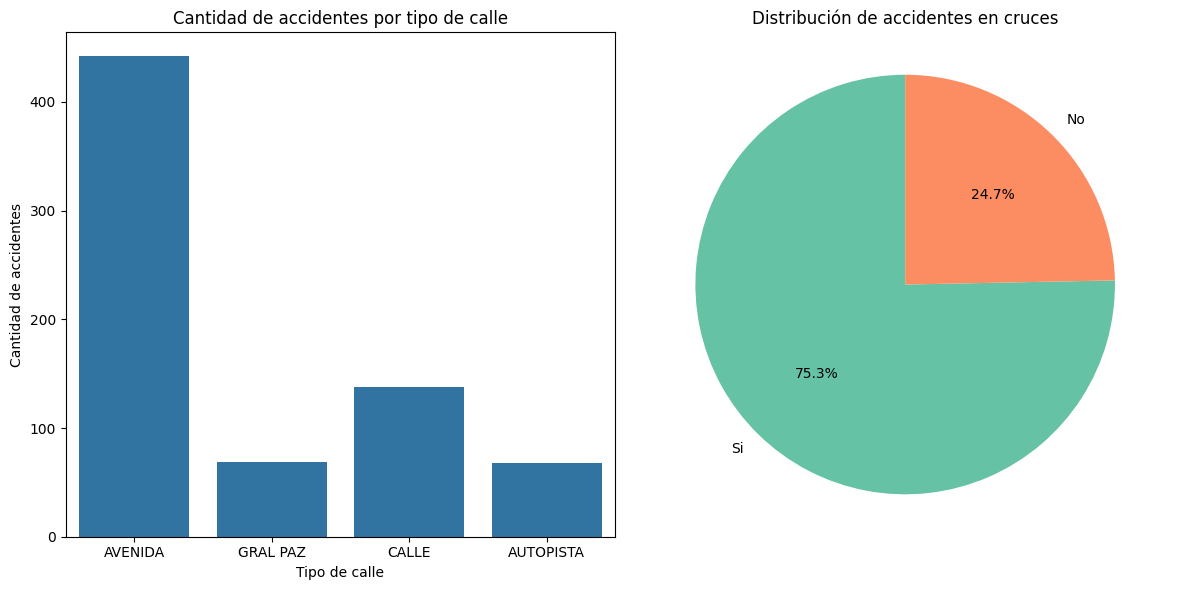

In [43]:
funciones.accidentes_tipo_de_calle(df_homicidios)

#### 4.2 Accidentes por Hora del Día:

Se observan picos pronunciados en horas de la Mañana, siendo los máximos de 5am - 8am, lo que sugiere que en esos momentos la probabilidad de sufrir un accidente es significativamente mayor. Estos picos podrían coincidir con horas pico de tráfico, momentos de mayor cansancio de los conductores o cambios de turno laborales. También se identifican horas con una menor cantidad de accidentes, estas horas podrían corresponder a momentos de menor flujo vehicular o a condiciones más favorables para la conducción.

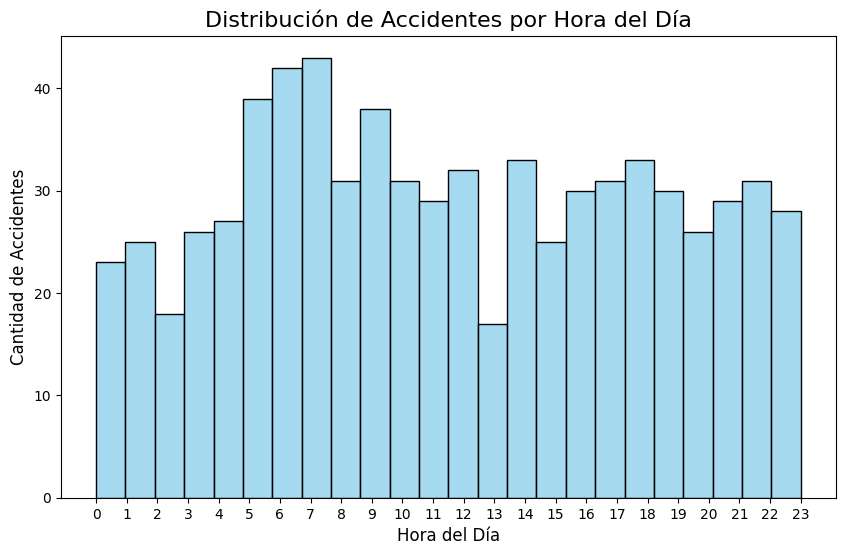

In [44]:
funciones.graficar_histograma_accidentes_hora(df_homicidios,'Hora')

#### 4.3 Accidentes por Mes:

Si bien hay variaciones mensuales, se puede identificar una tendencia general en la que el número de accidentes aumenta hacia finales de año, alcanzando su punto máximo en el mes de Diciembre. Períodos vacacionales y festividades suelen estar asociados con un mayor volumen de tráfico y, por consiguiente, un mayor riesgo de accidentes.

El mes con menor cantidad de accidentes tiene 51 accidentes
El mes con mayor cantidad de accidentes tiene 87 accidentes


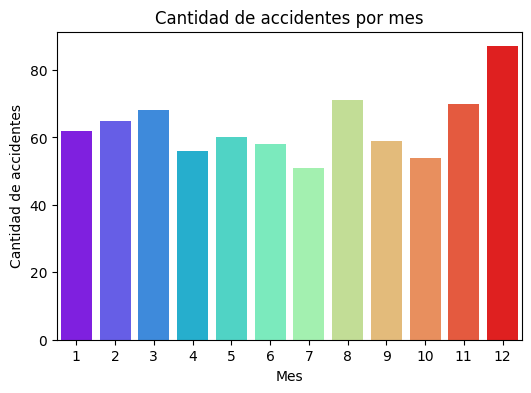

In [45]:
funciones.cantidad_de_accidentes_por_mes(df_homicidios)

#### 4.4 Accidentes por Rango Etario:

En este apartado se analizan las cantidades de accidentes por edades, las cuales para un mejor análisis fueron divididas en los siguientes rangos etarios:

- Infantes: edades menores a 15 años.
- Jóvenes: edades entre 16 y 25 años.
- Adultos: edades entre 26 y 50 años.
- Adultos mayores: edades entre 51 y 70 años.
- Ancianos: edades mayores a 71 años.

El grupo de adultos concentra la mayor cantidad de accidentes de tránsito. Esto puede deberse a diversos factores como mayor tiempo al volante, mayor cantidad de kilómetros recorridos y mayor exposición a diferentes condiciones de tráfico. Los grupos de adultos mayores y jóvenes siguen en cuanto a la cantidad de accidentes, aunque en menor proporción que los adultos. Esto podría estar relacionado con factores como la disminución de reflejos en los adultos mayores y la falta de experiencia y toma de riesgos en los jóvenes.

<Axes: xlabel='Rango etario', ylabel='Cantidad de accidentes'>

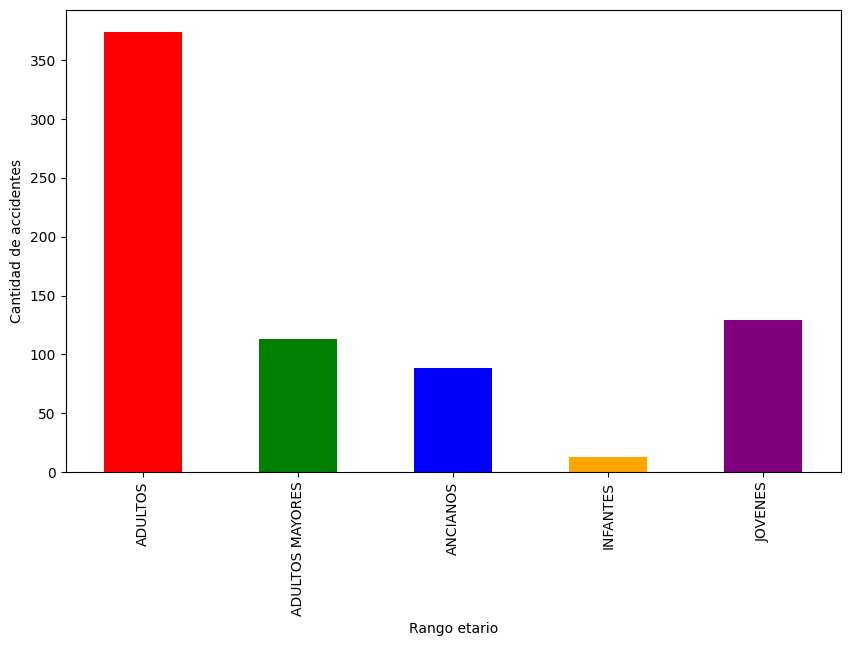

In [46]:
funciones.accidentes_por_rango_etario(df_homicidios)

#### 4.5 Accidentes según Sexo, por Rol y Tipo de Vehículo:

Es evidente que los hombres representan una proporción significativamente mayor en accidentes de tráfico en comparación con las mujeres. Esta disparidad puede atribuirse a diversos factores, como que solamente 4 de cada 10 mujeres sabe manejar, mientras que en los hombres la cifra asciende a 8 de cada 10 (Según estudio en CABA hecho por ANSV), diferencias en los hábitos de conducción, mayor exposición a riesgos laborales relacionados con el transporte y mayores velocidades promedio en los hombres. Los conductores y peatones son los roles con mayor número de accidentes, esto se puede deber a su exposición directa a los riesgos de la vía, por ende, se puede concluir también que las motocicletas y los peatones representan el mayor número de víctimas involucradas en accidentes.

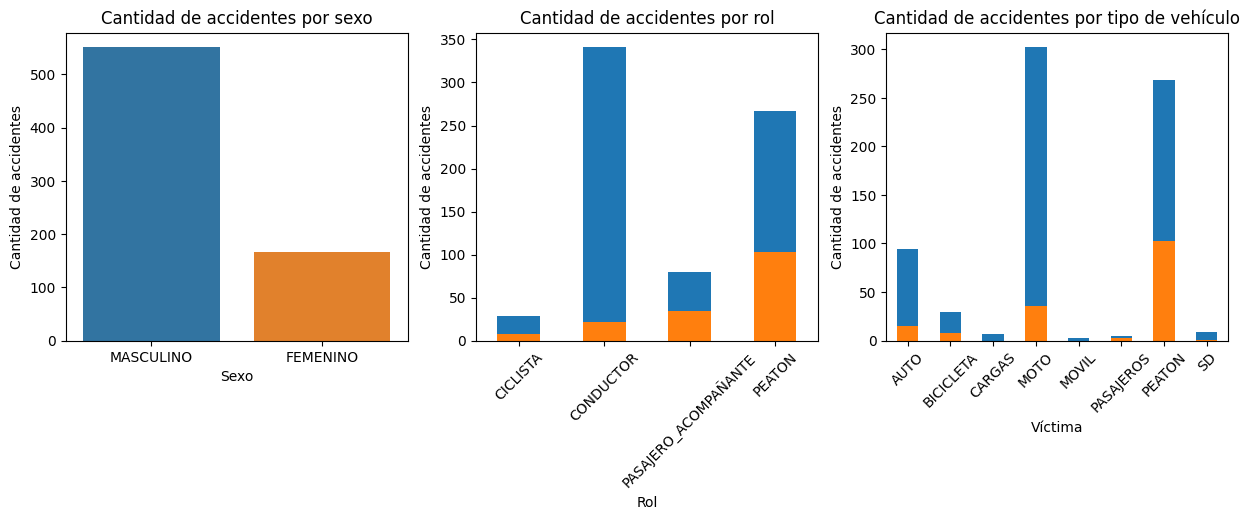

In [47]:
funciones.cantidad_accidentes_sexo_rol_victima(df_homicidios)

#### 4.6 Cantidad de Acusados:

Es evidente que los automóviles y los vehículos de pasajeros (como camionetas, furgonetas, etc.) concentran la mayor cantidad de acusados, esto sugiere que son los más utilizados en la vía, lo que aumenta la probabilidad de que estén involucrados en accidentes. Los vehículos de carga ocupan el tercer lugar en cuanto a cantidad de acusados, esto podría deberse a su mayor tamaño y peso, lo que los convierte en vehículos potencialmente más peligrosos en caso de accidente.

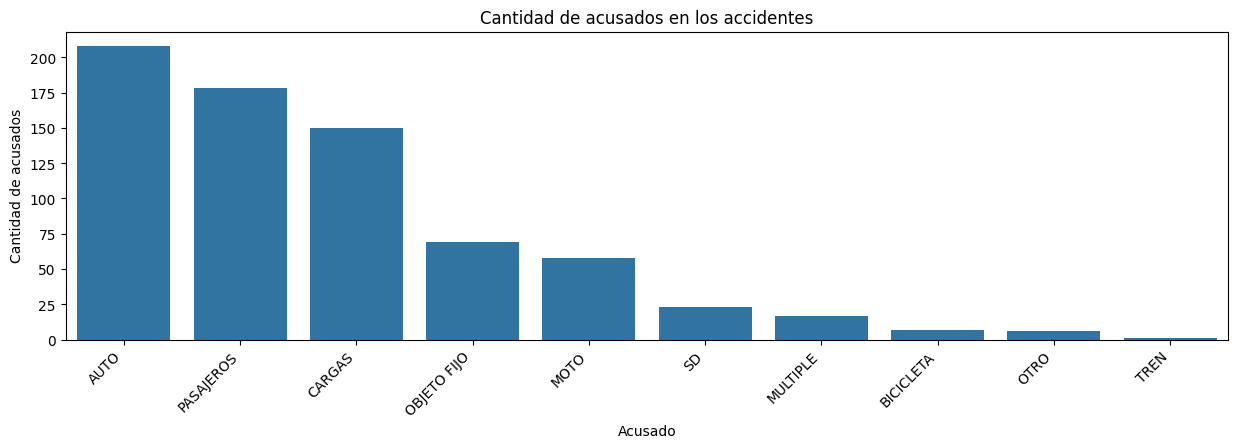

In [48]:
funciones.cantidad_acusados(df_homicidios)

### 5. Exportamos:

Ya con el EDA completamente realizado, procedemos a exportar nuestro Dataframe final para continuar con la creación del Dashboard en PowerBI.

In [49]:
df_homicidios.to_csv('datos_homicidios_final.csv', index=False, encoding='utf-8')
print('Se guardaron correctamente los datos.')

Se guardaron correctamente los datos.
